In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Problems with accuracy and unbalanced data

In [2]:
def plot_confusion_matrix(values, xlabel="predicted labels", ylabel="true labels", xticklabels=None,
                          yticklabels=None, cmap=None, vmin=None, vmax=None, ax=None,
                          fmt="{:.2f}", xtickrotation=45, norm=None):
    """Plot a matrix as heatmap with explicit numbers.
    Parameters
    ----------
    values : ndarray
        Two-dimensional array to visualize.
    xlabel : string, default=""
        Label for the x-axis.
    ylabel : string, default=""
        Label for the y-axis.
    xticklabels : list of string or None, default=None
        Tick labels for the x-axis.
    yticklabels : list of string or None, default=None
        Tick labels for the y-axis
    cmap : string or colormap
        Matpotlib colormap to use.
    vmin : int, float or None
        Minimum clipping value.
    vmax : int, float or None
        Maximum clipping value.
    ax : axes object or None
        Matplotlib axes object to plot into. If None, the current axes are
        used.
    fmt : string, default="{:.2f}"
        Format string to convert value to text.
    xtickrotation : float, default=45
        Rotation of the xticklabels.
    norm : matplotlib normalizer
        Normalizer passed to pcolor
    """
    import matplotlib.pyplot as plt
    if ax is None:
        ax = plt.gca()
    img = ax.pcolormesh(values, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
    # this will allow us to access the pixel values:
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_xlim(0, values.shape[1])
    ax.set_ylim(0, values.shape[0])

    if xticklabels is None:
        xticklabels = [""] * values.shape[1]
    if yticklabels is None:
        yticklabels = [""] * values.shape[0]

    # +.5 makes the ticks centered on the pixels
    ax.set_xticks(np.arange(values.shape[1]) + .5)
    ax.set_xticklabels(xticklabels, ha="center", rotation=xtickrotation)
    ax.set_yticks(np.arange(values.shape[0]) + .5)
    ax.set_yticklabels(yticklabels, va="center")
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            # pixel bright: use black for number
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt.format(value), color=c, ha="center", va="center")
    ax.invert_yaxis()
    return ax

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))

[[49  4]
 [ 5 85]]
0.9370629370629371


/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
y_true = np.zeros(100, dtype=int)
y_true[:10] = 1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]

In [5]:
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

0.9
0.9
0.9


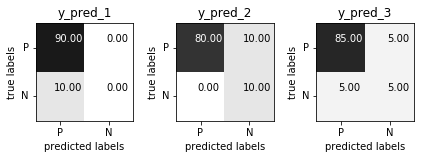

In [6]:
fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,
                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)
    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

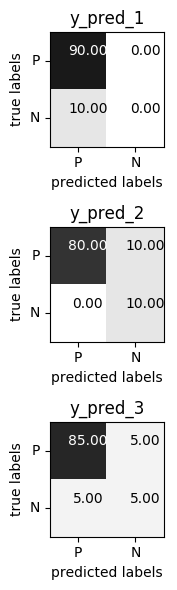

In [7]:
fig, axes = plt.subplots(3, dpi=100, figsize=(3, 6))

for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):

    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,

                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)

    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

In [8]:
from sklearn.metrics import classification_report
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

   micro avg       0.90      0.90      0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        90
           1       0.50      1.00      0.67        10

   micro avg       0.90      0.90      0.90       100
   macro avg       0.75      0.94      0.80       100
weighted avg       0.95      0.90      0.91       100

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        90
           1       0.50      0.50      0.50        10

   micro avg       0.90      0.90      0.90       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.90      0.90      0.90       100



/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# logistic regresson on breast cancer, but change threshold:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

   micro avg       0.94      0.94      0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [10]:
y_pred = lr.predict_proba(X_test)[:, 1] > .85

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        53
           1       1.00      0.90      0.95        90

   micro avg       0.94      0.94      0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.95      0.94      0.94       143



# Precision recall curves

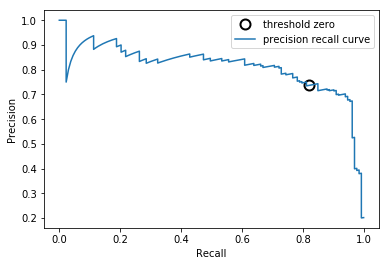

In [11]:
# this will look different on master, I'm using a branch with a bugfix!

from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve

X, y = make_blobs(n_samples=(2500, 500), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(recall, precision, label="precision recall curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="best")

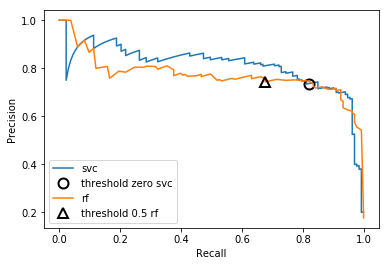

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label="svc")

plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(recall_rf, precision_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(recall_rf[close_default_rf], precision_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="best")

# F1 vs average precision

In [16]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(
      f1_score(y_test, rf.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.711
f1_score of svc: 0.776


In [17]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.770
Average precision of svc: 0.813


# ROC CURVE

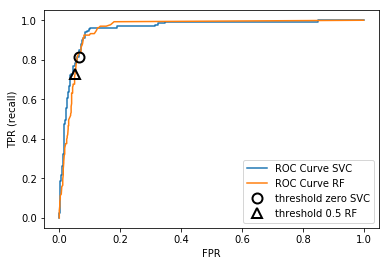

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

close_zero = np.argmin(np.abs(thresholds))

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

# Multi-class

In [22]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.964
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  1  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  2  0  0  1 44]]


In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.95      0.93        43
           2       0.98      1.00      0.99        44
           3       1.00      0.96      0.98        45
           4       0.97      0.97      0.97        38
           5       0.94      0.98      0.96        48
           6       0.98      0.98      0.98        52
           7       0.98      0.98      0.98        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.96      0.96      0.96       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.96      0.96      0.96       450



# with cross-validation

In [20]:
X, y = make_blobs(n_samples=(2500, 500), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# default scoring for classification is accuracy
scores_default = cross_val_score(SVC(), X, y)

# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), X, y, scoring="accuracy")

# using ROC AUC
roc_auc =  cross_val_score(SVC(), X, y, scoring="roc_auc")

print("Default scoring: {}".format(scores_default))
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
print("AUC scoring: {}".format(roc_auc))

/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Default scoring: [0.92  0.904 0.913]
Explicit accuracy scoring: [0.92  0.904 0.913]
AUC scoring: [0.93  0.885 0.923]


# Regression metrics

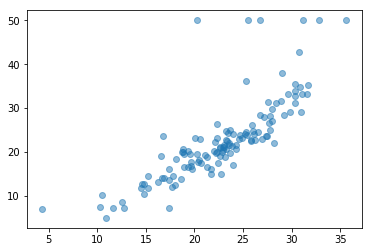

In [24]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

ridge = Ridge(normalize=True).fit(X_train, y_train)
pred = ridge.predict(X_test)
plt.plot(pred, y_test, 'o', alpha=.5)

Text(0,0.5,'true')

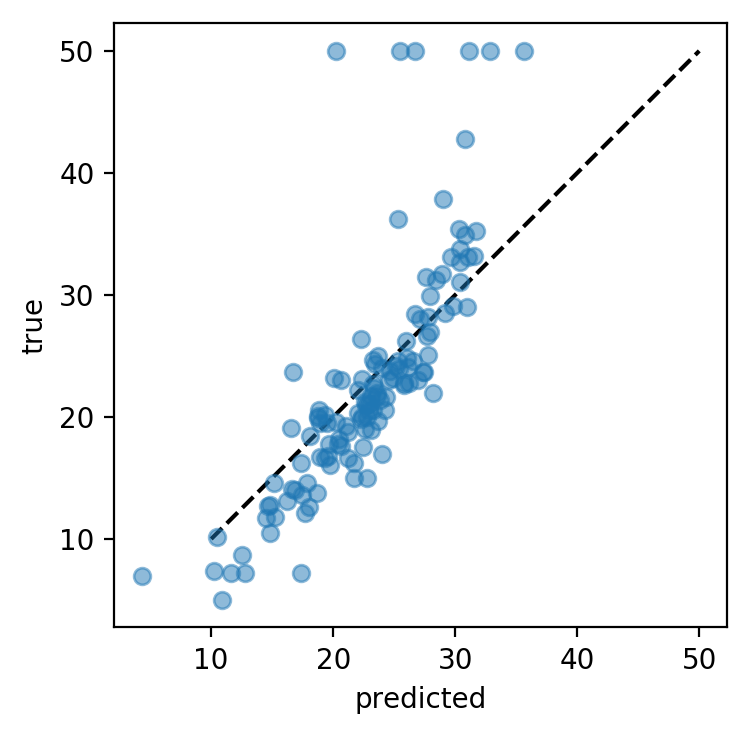

In [25]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([10, 50], [10, 50], '--', c='k')
plt.plot(pred, y_test, 'o', alpha=.5)
plt.xlabel("predicted")
plt.ylabel("true")

Text(0,0.5,'true - predicted')

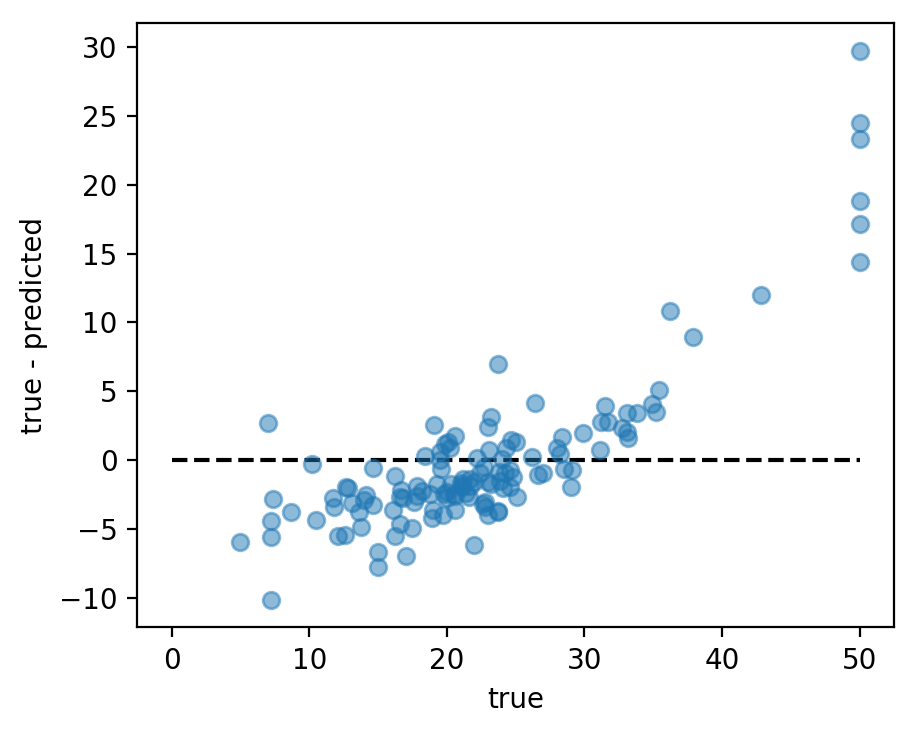

In [26]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([0, 50], [0, 0], '--', c='k')
plt.plot(y_test, y_test - pred, 'o', alpha=.5)
plt.xlabel("true")
plt.ylabel("true - predicted")

Text(0,0.5,'count')

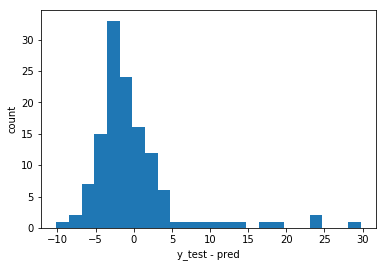

In [27]:
plt.hist(y_test - pred, bins="auto");
plt.xlabel("y_test - pred")
plt.ylabel("count")

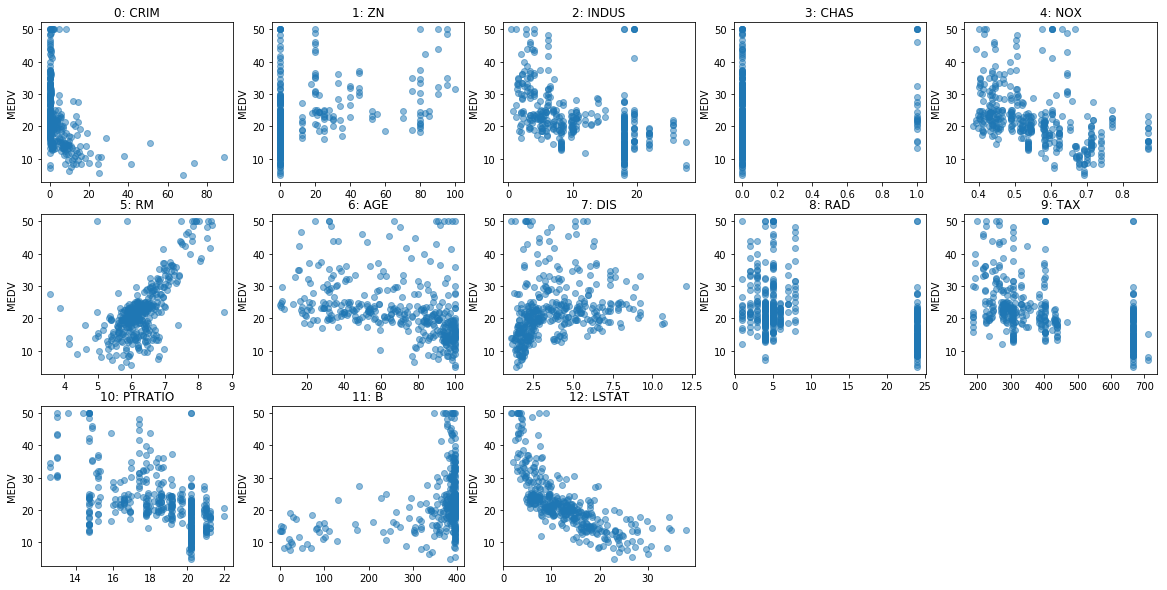

In [28]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_train[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [29]:
np.abs(y_test - pred)

array([ 0.537,  2.783,  3.444,  6.973,  1.573,  0.698,  2.381,  8.919,
        1.261,  0.686,  3.808,  1.428, 24.507,  0.293,  3.629,  3.102,
        2.557,  4.188,  2.867,  3.637,  1.382,  0.895,  1.633,  0.846,
        0.962,  2.18 ,  3.447,  3.491,  4.004,  6.959,  3.382,  2.695,
        4.323,  0.586,  3.403, 10.17 ,  2.283,  1.889, 17.187,  1.951,
        2.634,  1.755,  4.061,  1.665,  7.75 ,  2.424,  1.572,  3.039,
       23.31 ,  2.687,  3.931,  2.792,  1.328,  4.926,  0.745,  0.629,
        0.554,  0.839,  3.7  ,  5.086,  3.965,  2.048,  3.175,  5.428,
        2.676,  1.79 ,  2.029,  4.647,  4.119, 18.844,  2.797,  5.552,
        2.79 ,  3.63 ,  1.402,  1.97 ,  0.451,  1.534,  0.706,  1.865,
        3.811,  2.775,  2.437,  2.443,  2.599,  3.77 , 10.866,  0.128,
        1.963,  1.664,  0.041,  0.742,  0.886, 14.376,  2.321,  1.714,
        0.233,  1.054,  2.697,  2.906,  1.183,  2.458,  3.127,  2.037,
        2.329,  5.927,  3.237,  1.345,  4.396,  1.737,  1.947, 12.004,
      

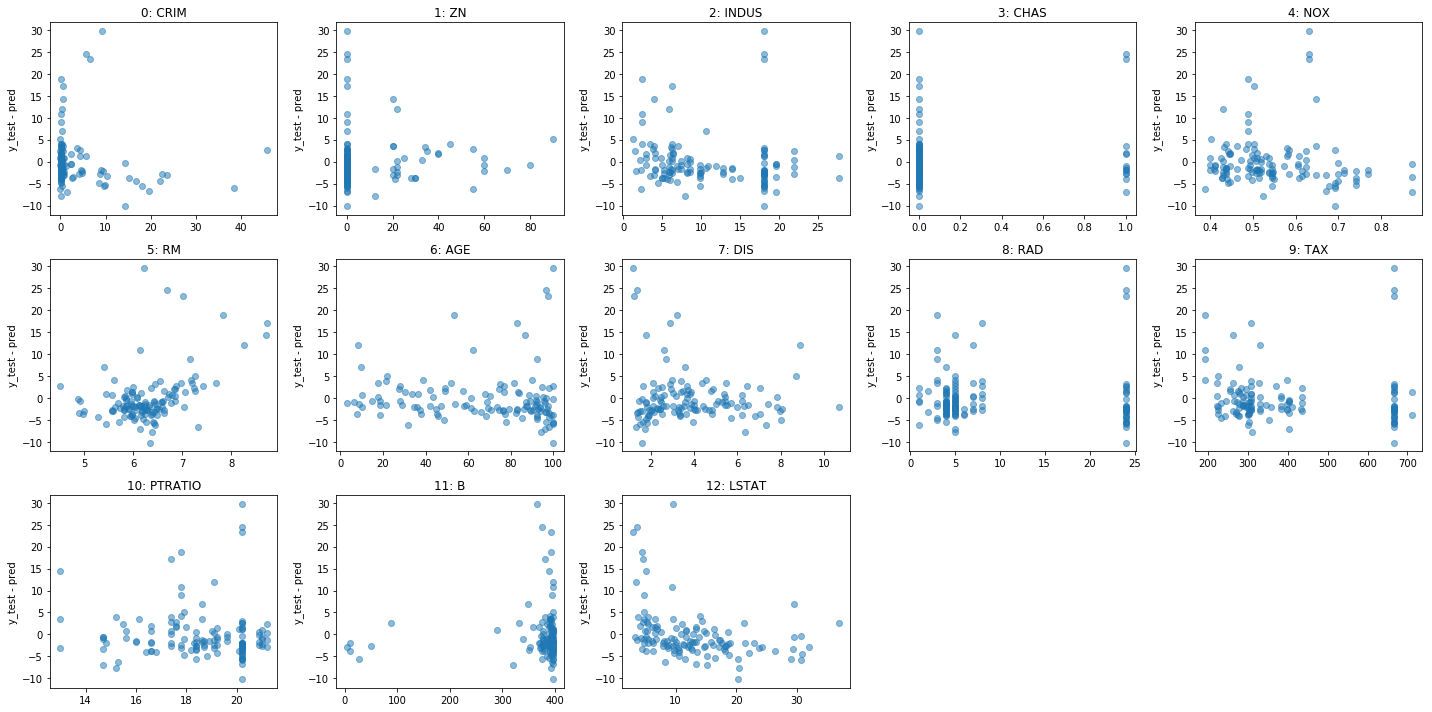

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_test[:, i], y_test - pred, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("y_test - pred")
plt.tight_layout()

# MAPE

In [31]:
def mape(y_true, y_pred):
    return 100 * np.abs((y_true - y_pred) / y_true).mean()

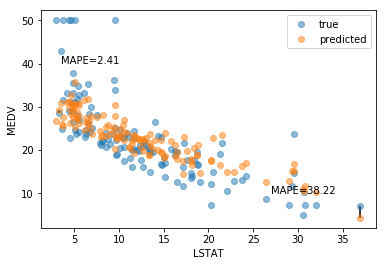

In [32]:
plt.plot(X_test[:, -1], y_test, 'o', alpha=.5, label="true")
plt.plot(X_test[:, -1], pred, 'o', alpha=.5, label='predicted')
plt.ylabel("MEDV")
plt.xlabel("LSTAT")
inds = np.argsort(X_test[:, -1])
last = inds[-1]
other = inds[1]

plt.text(27, 10, "MAPE={:.2f}".format(mape(y_test[last], pred[last])))
plt.errorbar(X_test[last, -1], y_test[last], fmt='none', yerr=([y_test[last] - pred[last]], [0]), c='k')
plt.text(3.5, 40, "MAPE={:.2f}".format(mape(y_test[other], pred[other])))
plt.errorbar(X_test[other, -1], y_test[other], fmt='none', yerr=([y_test[other] - pred[other]], [0]), c='k')

plt.legend()

In [33]:
mape(y_test, pred)

18.124318412560132